In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.stats import sem

#### LEDO Data: 
##### Get mean and SE for each lawn type
##### Create bar charts for each day

In [2]:
basepath = 'C:/Users/roseh/Desktop/NYBG_R/'
file_location = 'data/processed'
os.chdir(os.path.join(basepath,file_location))

In [80]:
dataframe = 'LDEO_091622.csv'

In [81]:
df = pd.read_csv(dataframe,usecols=['Date','Flux','Collar','Site','Type','Number']) # read in csv and select columns
date = df['Date'][0][:10]
types = []
means=[]
ses=[]
    
type_grouped = df.groupby('Type')    # group dataframe by type

In [82]:
df

,Date,Flux,Collar,Site,Type,Number
0,2022-09-16 10:03:09,7.48513,LH_UL1,LH,UL,1
1,2022-09-16 10:06:02,9.57040,LH_UL2_R,LH,UL,2
2,2022-09-16 10:08:59,15.51025,LH_UL3_R,LH,UL,3
3,2022-09-16 10:11:10,9.93119,LH_UL4_R,LH,UL,4
4,2022-09-16 10:13:29,9.77876,LH_UL5_R,LH,UL,5
5,2022-09-16 10:15:45,10.43627,LH_UL6_R,LH,UL,6
6,2022-09-16 10:49:10,6.20890,LH_SV1_R,LH,SV,1
7,2022-09-16 10:57:24,3.15596,LH_SV2_R,LH,SV,2
8,2022-09-16 11:06:49,12.95654,LC_HL1_R,LC,HL,1
9,2022-09-16 11:11:03,14.22893,LC_HL2_R,LC,HL,2


In [83]:
if 'SV' in type_grouped.groups:         # savannah
    SV = type_grouped.get_group('SV')    
    SV_mean = SV['Flux'].mean()
    SV_se = sem(SV['Flux'])
        
    types.append('Savannah')
    means.append(SV_mean)
    ses.append(SV_se)
else:
    pass

In [84]:
if 'UL' in type_grouped.groups:              #unmanaged lawn
    UL = type_grouped.get_group('UL')
        
    UL_mean = UL['Flux'].mean()
    UL_se = sem(UL['Flux'])
        
    types.append('Unmanaged Lawn')
    means.append(UL_mean)
    ses.append(UL_se)
else:
    pass

In [85]:
if 'HL' in type_grouped.groups:              #hot lawn
    HL = type_grouped.get_group('HL')
        
    HL_mean = HL['Flux'].mean()
    HL_se = sem(HL['Flux'])
        
    types.append('Hot Lawn')
    means.append(HL_mean)
    ses.append(HL_se)
else:
    pass

In [19]:
if 'HL' in type_grouped.groups:                             # hot lawn - run only if data from two sites (lC and LM) is included
    HL= type_grouped.get_group('HL')
                    
    LC_HL_mean = HL['Flux'].loc[HL['Site']=='LC'].mean()    # get mean for site 1
    LM_HL_mean = HL['Flux'].loc[HL['Site']=='LM'].mean()    # get mean for site 2
    HL_array = np.array([LC_HL_mean,LM_HL_mean])            

    HL_mean = HL_array.mean()                               # get mean and se of the site means
    HL_se = sem(HL_array)
       
    types.append('Hot Lawn')
    means.append(HL_mean)
    ses.append(HL_se)
else:
    pass

In [86]:
data = {'date': date,
        'type': types,
        'mean':means,
        'se':ses}
                    
plot_df = pd.DataFrame(data)

In [87]:
plot_df

,date,type,mean,se
0,2022-09-16,Savannah,4.682430,1.526470
1,2022-09-16,Unmanaged Lawn,10.452000,1.093773
2,2022-09-16,Hot Lawn,14.441485,1.131120


In [88]:
output_folder = 'C:/Users/roseh/Desktop/NYBG_R/data/processed'
filename = 'plotdata_' + dataframe
path = os.path.join(output_folder,filename)
plot_df.to_csv(path)

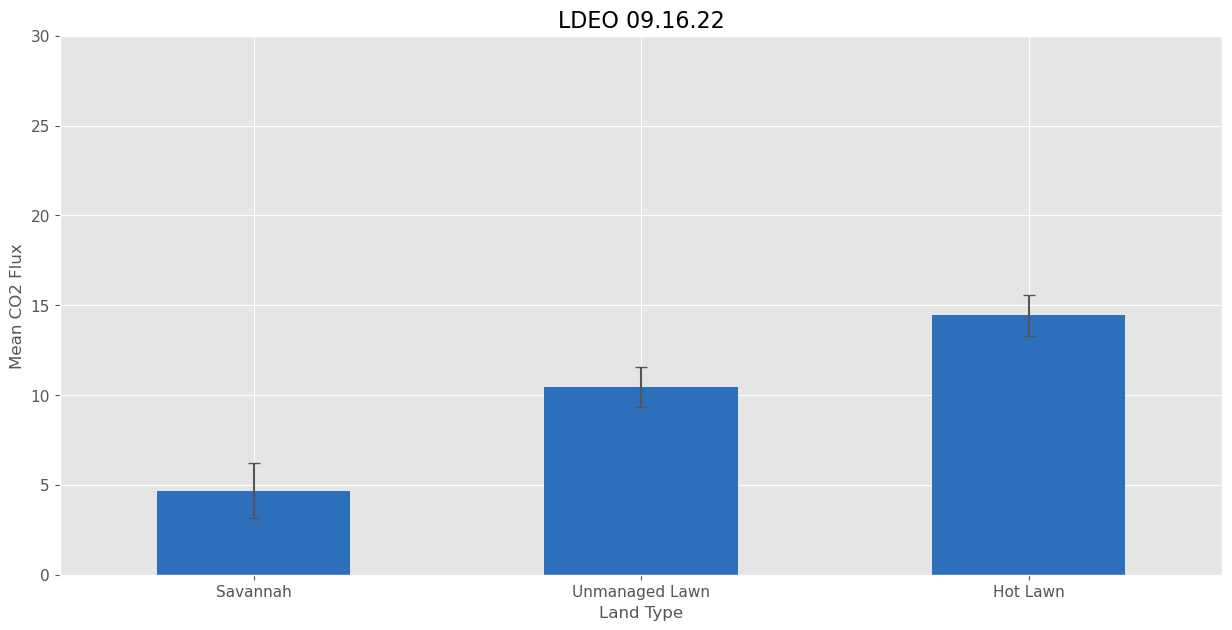

In [89]:
title = 'LDEO 09.16.22'
color = 'xkcd:medium blue'
plt.style.use('ggplot')

ax = plot_df.plot(x='type',
                  y='mean',
                  kind='bar',
                  yerr='se',
                  figsize=(15,7),
                  rot=0,
                 fontsize=11,
                 capsize=4,
                 legend=False,
                 color = color,
                 ylim=[0,30])
ax.set_title(title,fontsize=16)
ax.set_ylabel('Mean CO2 Flux',fontsize=12)
ax.set_xlabel('Land Type',fontsize=12)
plt.show()

In [90]:
output_folder = 'C:/Users/roseh/Desktop/NYBG_R/reports/figures'
filename = f'{title}.png'
ax.figure.savefig(os.path.join(output_folder,filename))